## Clustering in Slides

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score


In [2]:
height = [150,165,140,200,120,110,180,100,140]
weight = [120,180,100,200,90,100,200,90,110]

In [3]:
df = pd.DataFrame({"height": height, "weight": weight})

In [4]:
df

,height,weight
0,150,120
1,165,180
2,140,100
3,200,200
4,120,90
5,110,100
6,180,200
7,100,90
8,140,110


In [5]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)

In [6]:
df["Cluster"] = kmeans.fit_predict(df)

In [7]:
df

,height,weight,Cluster
0,150,120,0
1,165,180,1
2,140,100,0
3,200,200,1
4,120,90,0
5,110,100,0
6,180,200,1
7,100,90,0
8,140,110,0


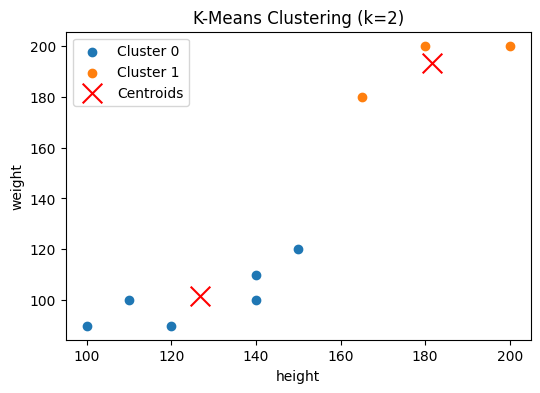

In [8]:
plt.figure(figsize=(6, 4))
for cluster in range(k):
    cluster_points = df[df["Cluster"] == cluster]
    plt.scatter(cluster_points["height"], cluster_points["weight"], label=f"Cluster {cluster}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="x", s=200, label="Centroids")
plt.xlabel("height")
plt.ylabel("weight")
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()

In [9]:
# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score (requires at least 2 clusters)
silhouette = silhouette_score(df.drop("Cluster", axis=1), df["Cluster"])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

Inertia: 3500.0
Silhouette Score: 0.7225010828543394


In [10]:
X = [9,2,8,3,4]
Y = [2,4,8,6,3]

df2 = pd.DataFrame({"X": X, "Y": Y})

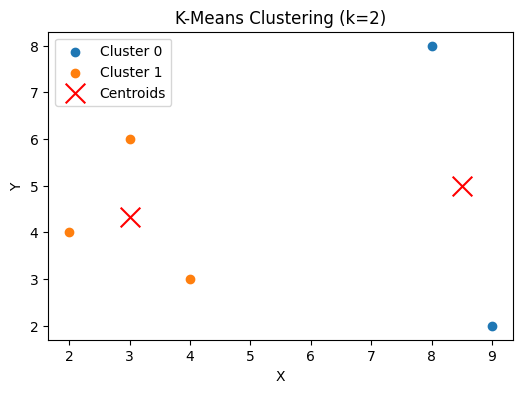

In [11]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
df2["Cluster"] = kmeans.fit_predict(df2)

plt.figure(figsize=(6, 4))
for cluster in range(k):
    cluster_points = df2[df2["Cluster"] == cluster]
    plt.scatter(cluster_points["X"], cluster_points["Y"], label=f"Cluster {cluster}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="x", s=200, label="Centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()

In [12]:
# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate silhouette score (requires at least 2 clusters)
silhouette = silhouette_score(df2.drop("Cluster", axis=1), df2["Cluster"])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

Inertia: 25.166666666666668
Silhouette Score: 0.38030451706136387


## Association Rules

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (one-hot encoded format)
dataset = [
    ['urban', 'populous', 'in-mall', 'profitable'],
    ['populous', 'near-school', 'profitable'],
    ['near-school'],
    ['urban', 'populous', 'profitable'],
    ['populous'], 
    ['urban', 'populous', 'profitable'],
    ['populous', 'in-mall', 'profitable'],
    ['in-mall', 'profitable']
]

# Convert to one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Generate all association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Apply dual thresholds: confidence >= 0.6 and lift >= 1.2
filtered_rules = rules[(rules['confidence'] >= 0.6) & (rules['lift'] >= 1.2)]

# Display the filtered rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("Filtered Association Rules:")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
   support                       itemsets
0    0.375                      (in-mall)
1    0.750                     (populous)
2    0.750                   (profitable)
3    0.375                        (urban)
4    0.375          (in-mall, profitable)
5    0.625         (populous, profitable)
6    0.375              (populous, urban)
7    0.375            (urban, profitable)
8    0.375  (populous, urban, profitable)
Rules:
               antecedents             consequents  support  confidence   
0                (in-mall)            (profitable)    0.375    1.000000  \
1             (profitable)               (in-mall)    0.375    0.500000   
2               (populous)            (profitable)    0.625    0.833333   
3             (profitable)              (populous)    0.625    0.833333   
4               (populous)                 (urban)    0.375    0.500000   
5                  (urban)              (populous)    0.375    1.000000   
6                  (urban)   